In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [ ]:
TrainData = pd.read_csv('/content/drive/My Drive/Data Science Place/Hackathon 1 - Credit card customer 2020/Data/Train.csv')
TestData = pd.read_csv('/content/drive/My Drive/Data Science Place/Hackathon 1 - Credit card customer 2020/Data/Test.csv')

In [ ]:
print("Train data shape: ", TrainData.shape)
print("Test data shape: ", TestData.shape)

Train data shape:  (15000, 44)
Test data shape:  (5000, 43)


In [ ]:
TrainData.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


**Removing unuse colums**

In [ ]:
data=TrainData.drop(['ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'],axis=1)
print(data.shape)

**Encoding categorical data using one hot encoding**

In [ ]:
data = pd.get_dummies(data=data, columns=['account_type', 'gender'])
data.head(5)

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_current,account_type_saving,gender_F,gender_M
0,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0,1,0,0,1
1,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0,1,0,0,1
2,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0,1,0,0,1
3,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0,1,0,1,0
4,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0,1,0,0,1


**Outliers Function to check outliers in dataframe**

In [ ]:
def check_outliers(df):
  col = list(df)
  outliers = pd.DataFrame(columns=['columns','Outliers'])
  
  for column in col:
      if column in df.select_dtypes(include=np.number).columns:
          q1 = df[column].quantile(0.25) 
          q3 = df[column].quantile(0.75)
          below = q1 - (1.5*q3 - q1)
          above = q3 + (1.5*q3 - q1)
          outliers = outliers.append({'columns':column,'Outliers':df.loc[(df[column] < below) | (df[column] > above)].shape[0]},ignore_index=True)
  return outliers

In [ ]:
check_outliers(data)

In [ ]:
X = data.drop(['cc_cons'], axis=1) 
y = data['cc_cons']

**log Transformation to normilize the value of target variable**

In [ ]:
y = np.log1p(y)

In [ ]:
# seprate the num columns and cat data columns
X_cols = X.columns
num_cols = X.select_dtypes(exclude=['object','category']).columns
cat_cols = [i for i in X_cols if i not in X[num_cols].columns]
for i in cat_cols:
    X[i] = X[i].astype('category')

**Function for removing outliers**

In [ ]:
def removing_outliers(dataframe):
  cols = list(dataframe)
  for col in cols:
      if col in dataframe.select_dtypes(include=np.number).columns:
          dataframe[col] = winsorize(dataframe[col], limits=[0.1, 0.1],inclusive=(True, True))
  
  return dataframe

In [ ]:
X[num_cols] = removing_outliers(X[num_cols])
check_outliers(X)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [ ]:
def rmsle(actual_column, predicted_column):
  sum=0.0
  for x,y in zip(actual_column,predicted_column):
      if x<0 or y<0: #check for negative values. 
          continue
      p = np.log(y+1)
      r = np.log(x+1)
      sum = sum + (p - r)**2
  return (sum/len(predicted_column))**0.5

# **LinearRegression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
Train_rmse=np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))
Train_Test_rmse=np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))
Train_rmse,Train_Test_rmse
print('Rmse Train data',Train_rmse)
print('Rmse Test data',Train_Test_rmse)

Rmse Train data 1.6079870472306739
Rmse Test data 1.6146818591360468


In [ ]:
print('RMSLE',rmsle(y_test,y_pred))

RMSLE 0.16140504899808053


(array([1.000e+00, 1.000e+00, 9.000e+00, 2.500e+01, 6.900e+01, 2.550e+02,
        1.091e+03, 1.500e+03, 2.240e+02, 5.750e+02]),
 array([-9.46381637, -8.1683397 , -6.87286302, -5.57738634, -4.28190967,
        -2.98643299, -1.69095631, -0.39547964,  0.89999704,  2.19547372,
         3.49095039]),
 <a list of 10 Patch objects>)

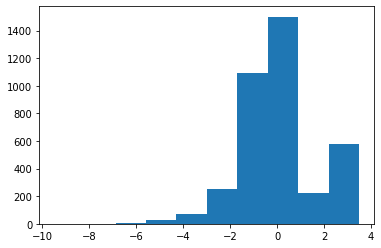

In [ ]:
resid = y_test - y_pred
plt.hist(resid)

# **Test data**

In [ ]:
TestData = pd.read_csv('/content/drive/My Drive/Data Science Place/Hackathon 1 - Credit card customer 2020/Data/Test.csv')

In [ ]:
TestData.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,56.0,6.0,125000.0,1.0,1.0,1.0,1.0,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36.0,24485.0,23512.67,41755.0,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,38.0,31.0,59000.0,1.0,1.0,1.0,1.0,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5.0,3375.0,15049.44,130299.0,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,27.0,2.0,49999.0,1.0,1.0,1.0,1.0,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6.0,14950.0,133659.00,40422.0,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,1.0,11.0,520000.0,1.0,1.0,1.0,1.0,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1.0,235844.0,99686.03,48148.0,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,25.0,1.0,152000.0,1.0,1.0,1.0,1.0,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1.0,14495.0,190374.25,25926.0,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [ ]:
T_data=TestData.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'],axis=1)
print(T_data.shape)

(5000, 38)


In [ ]:
T_data = pd.get_dummies(data=T_data, columns=['account_type', 'gender'])
T_data.head(5)

,ID,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,17591,37,575,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,56.0,6.0,125000.0,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36.0,24485.0,23512.67,41755.0,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,1170.49,1,0,0,1
1,13541,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,38.0,31.0,59000.0,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5.0,3375.0,15049.44,130299.0,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,16447.45,1,0,0,1
2,13431,53,324,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,27.0,2.0,49999.0,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6.0,14950.0,133659.00,40422.0,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,2622.28,1,0,0,1
3,8687,33,370,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,1.0,11.0,520000.0,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1.0,235844.0,99686.03,48148.0,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,340.79,1,0,0,1
4,14727,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,25.0,1.0,152000.0,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1.0,14495.0,190374.25,25926.0,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,2812.20,1,0,0,1


In [ ]:
check_outliers(T_data)

In [ ]:
T_data[num_cols] = removing_outliers(T_data[num_cols])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
check_outliers(T_data)

In [ ]:
Test_Id = T_data['ID']
TestData = T_data.drop(['ID'],axis=1)

In [ ]:
TestData.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,37,575,2795.45,1290.0,6141.05,690.48,9146.10,15479.00,4.0,10.0,4.0,47.0,44.0,6.0,125000.0,690.00,376600.5,1633.0,-5715.49023,27646.84,44341.00,16.0,35.0,24485.0,23512.67,41755.0,24.0,20.0,12257.0,30527.88,31271.00,3.0,12.0,25945.92,1170.49,1,0,0,1
1,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,38.0,31.0,59000.0,101891.25,470000.0,891.0,12299.00000,32247.25,21946.00,42.0,5.0,13906.0,15049.44,130299.0,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,16447.45,1,0,0,1
2,53,324,5985.20,6189.0,2696.09,766.00,1344.00,4133.22,7.0,30.0,5.0,24.0,27.0,2.0,49999.0,53374.97,470000.0,54101.0,2557.00000,63169.00,36616.50,41.0,6.0,14950.0,133659.00,40422.0,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,2622.28,1,0,0,1
3,33,370,2105.93,18225.0,34763.56,690.48,4260.27,15620.69,2.0,83.0,71.0,5.0,1.0,11.0,520000.0,9118.35,470000.0,5905.0,5464.00000,39442.80,43173.38,46.0,1.0,94812.0,99686.03,48148.0,3.0,6.0,97825.0,93572.42,109429.75,21.0,7.0,72317.00,472.47,1,0,0,1
4,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,25.0,1.0,152000.0,720551.40,11897.0,126001.0,1332.00000,10124.00,15232.00,11.0,1.0,14495.0,134968.36,25926.0,43.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,2812.20,1,0,0,1


In [ ]:
Test_df_col = TestData.columns

In [ ]:
TestData = scaler.transform(TestData)
TestData = pd.DataFrame(TestData, columns=Test_df_col)

In [ ]:
TestData['cc_cons'] = lr.predict(TestData)
TestData['cc_cons'] = np.exp(TestData['cc_cons'])-1
submissions_lr = pd.concat([Test_Id, TestData['cc_cons']], axis=1) 
submissions_lr